In [1]:
%matplotlib notebook
%pylab
import pandas as pd

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
def set_xticks(P):
    p0 = log2(P[0])
    p1 = log2(P[-1])
    xlim([2**(p0-1), 2**(p1+1)])
    
    Pstr = (['{:d}'.format(int(p)) for p in P])
    xticks(P,Pstr)

# Initialize the dataframe table

In [3]:
import pandas 

idx = pandas.IndexSlice

orders = array([2,3,4])        # polynomial order
Nv = array([8,16,24,32])

# Integration  : 
# time steps   : Number of time steps to time tfinal
# dt           : Time step size
# CFL          : CFL number
# Errors       : (1-norm, 2-norm and inf-norm) errors

ex_list = ['Diffusion']

cols = ['time steps', 'cfl','2-norm']

iterables = [ex_list, ['Dirichlet','Neumann'],['Python','NUMO','Matlab'], orders, Nv]

index = pandas.MultiIndex.from_product(iterables,names=['Eq.','BCs','Code','order','elements'])
df = pandas.DataFrame(index=index,columns=cols).sort_index()

df.loc[idx['Diffusion','Dirichlet',['Python']]]

time steps  cfl 2-norm
Eq.       BCs       Code   order elements                       
Diffusion Dirichlet Python 2     8               NaN  NaN    NaN
                                 16              NaN  NaN    NaN
                                 24              NaN  NaN    NaN
                                 32              NaN  NaN    NaN
                           3     8               NaN  NaN    NaN
                                 16              NaN  NaN    NaN
                                 24              NaN  NaN    NaN
                                 32              NaN  NaN    NaN
                           4     8               NaN  NaN    NaN
                                 16              NaN  NaN    NaN
                                 24              NaN  NaN    NaN
                                 32              NaN  NaN    NaN

# Load data output data from Python, Matlab and NUMO codes

In [4]:
output_file = 'Neumann_py/output4.dat'

# Open file as a binary file
fout = open(output_file,"rb")  
nlen = fromfile(fout,dtype=int,count=1)

# Create a data type for storing results;  use 'd' for double precision entries
dt_data = dtype([('N',int),('M',int),('cfl','d'),('2-norm','d')])

# Create a nested data type
dt_info = dtype([('order',int),('integType',int)])
dt_block = dtype([('info',dt_info),('data',(dt_data,len(Nv)))])

# Read in four sets of data (orders 1,2 and integType 1,2)
out_data = fromfile(fout,dtype=dt_block, count=len(Nv))

fout.close()

# Store data in DataFrame
for k in range(3):                  # order = (1,2) x integType = (1,2)
    order = out_data[k]['info']['order']
    Itype = out_data[k]['info']['integType']
    
    for d in out_data[k]['data']:
        N = d[0]
        a = [d[i] for i in range(1,len(d))]
        df.loc[idx['Diffusion','Neumann','Python',order,N],cols] = a


# Format the data when displaying the DataFrame

fstr = {'cfl' : "{:.2f}".format, 
        '2-norm' : '{:.4e}'.format,}
        
df_out = df.loc[idx['Diffusion','Neumann',['Python'],:],:]
df_out.style.format(fstr)

In [5]:
output_file = 'Neumann_py/output.dat'

# Open file as a binary file
fout = open(output_file,"rb")  
nlen = fromfile(fout,dtype=int,count=1)

# Create a data type for storing results;  use 'd' for double precision entries
dt_data = dtype([('N',int),('M',int),('cfl','d'),('2-norm','d')])

# Create a nested data type
dt_info = dtype([('order',int),('integType',int)])
dt_block = dtype([('info',dt_info),('data',(dt_data,len(Nv)))])

# Read in four sets of data (orders 1,2 and integType 1,2)
out_data = fromfile(fout,dtype=dt_block, count=len(Nv))

fout.close()

# Store data in DataFrame
for k in range(3):                  # order = (1,2) x integType = (1,2)
    order = out_data[k]['info']['order']
    Itype = out_data[k]['info']['integType']
    
    for d in out_data[k]['data']:
        N = d[0]
        a = [d[i] for i in range(1,len(d))]
        df.loc[idx['Diffusion','Dirichlet','Python',order,N],cols] = a


# Format the data when displaying the DataFrame

fstr = {'cfl' : "{:.2f}".format, 
        '2-norm' : '{:.4e}'.format,}
        
df_out = df.loc[idx['Diffusion','Dirichlet',['Python'],:],:]
df_out.style.format(fstr)

In [6]:
# Load matlab data

data_02 = loadtxt('diffusion_matlab/Neumann/conv_nop2_1.dat')
data_03 = loadtxt('diffusion_matlab/Neumann/conv_nop3_1.dat')
data_04 = loadtxt('diffusion_matlab/Neumann/conv_nop4.dat')

data_matlab = array([data_02, data_03,data_04])

# Store data in DataFrame
for k in range(3):                  # order = (1,2) x integType = (1,2)
    order = out_data[k]['info']['order']
    Itype = out_data[k]['info']['integType']
    
    for i in range(len(Nv)):
        
        N = Nv[i]
        a = data_matlab[k,i][1:]
        df.loc[idx['Diffusion','Neumann','Matlab',order,N],cols] = a


# Format the data when displaying the DataFrame

fstr = {'cfl' : "{:.2f}".format, 
        '2-norm' : '{:.4e}'.format,}
        
df_out = df.loc[idx['Diffusion','Neumann',['Matlab'],:],:]
df_out.style.format(fstr)

In [7]:
# Load matlab data

data_02 = loadtxt('diffusion_matlab/Dirichlet/conv_nop2_5.dat')
data_03 = loadtxt('diffusion_matlab/Dirichlet/conv_nop3_5.dat')
data_04 = loadtxt('diffusion_matlab/Dirichlet/conv_nop4_5.dat')

data_matlab = array([data_02, data_03,data_04])

# Store data in DataFrame
for k in range(3):                  # order = (1,2) x integType = (1,2)
    order = out_data[k]['info']['order']
    Itype = out_data[k]['info']['integType']
    
    for i in range(len(Nv)):
        
        N = Nv[i]
        a = data_matlab[k,i][1:]
        df.loc[idx['Diffusion','Dirichlet','Matlab',order,N],cols] = a


# Format the data when displaying the DataFrame

fstr = {'cfl' : "{:.2f}".format, 
        '2-norm' : '{:.4e}'.format,}
        
df_out = df.loc[idx['Diffusion','Dirichlet',['Matlab'],:],:]
df_out.style.format(fstr)

In [8]:
# Load NUMO data, Neumann

data_02 = loadtxt('NUMO/Neumann/conv__nop2_2.dat')
data_03 = loadtxt('NUMO/Neumann/conv__nop3_2.dat')
data_04 = loadtxt('NUMO/Neumann/conv__nop4_2.dat')

data_NUMO = array([data_02, data_03,data_04])

# Store data in DataFrame
for k in range(3):                  # order = (1,2) x integType = (1,2)
    order = out_data[k]['info']['order']
    Itype = out_data[k]['info']['integType']
    
    for i in range(len(Nv)):
        
        N = Nv[i]
        a = data_NUMO[k,i][1:]
        df.loc[idx['Diffusion','Neumann','NUMO',order,N],cols] = a


# Format the data when displaying the DataFrame

fstr = {'cfl' : "{:.2f}".format, 
        '2-norm' : '{:.4e}'.format,}
        
df_out = df.loc[idx['Diffusion','Neumann',['NUMO'],:],:]
df_out.style.format(fstr)

In [9]:
# Load NUMO data, dirichlet

data_02 = loadtxt('NUMO/Dirichlet/conv__nop2.dat')
data_03 = loadtxt('NUMO/Dirichlet/conv__nop3.dat')
data_04 = loadtxt('NUMO/Dirichlet/conv__nop4.dat')

data_NUMO = array([data_02, data_03,data_04])

# Store data in DataFrame
for k in range(3):                  # order = (1,2) x integType = (1,2)
    order = out_data[k]['info']['order']
    Itype = out_data[k]['info']['integType']
    
    for i in range(len(Nv)):
        
        N = Nv[i]
        a = data_NUMO[k,i][1:]
        df.loc[idx['Diffusion','Dirichlet','NUMO',order,N],cols] = a


# Format the data when displaying the DataFrame

fstr = {'cfl' : "{:.2f}".format, 
        '2-norm' : '{:.4e}'.format,}
        
df_out = df.loc[idx['Diffusion','Dirichlet',['NUMO'],:],:]
df_out.style.format(fstr)

# Convergence plots

<IPython.core.display.Javascript object>


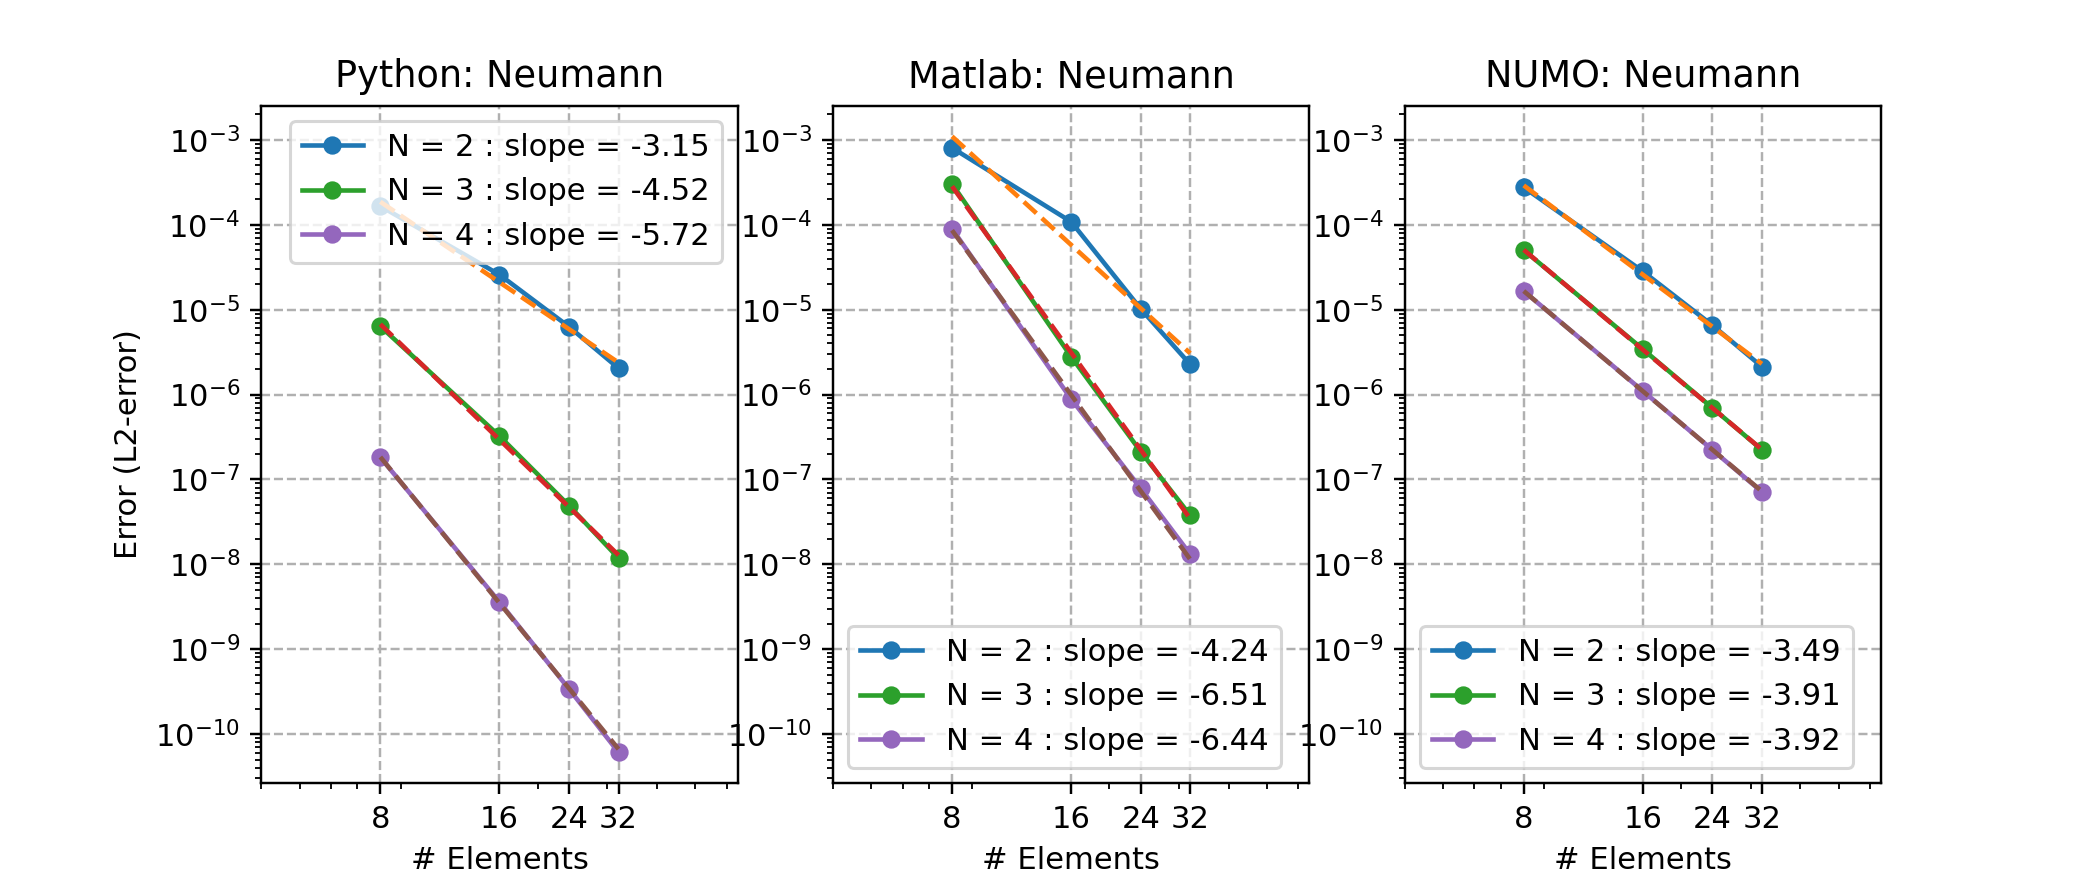

In [12]:

#plt.rcParams.update({'font.size': 8})

fg = figure(1,figsize=(9.5,4))

codes = ['Python','Matlab','NUMO']
sb_id = [131, 132, 133]
ax1 = fg.add_subplot(131)

for idc, code in enumerate(codes):
    
    sbp = sb_id[idc]
    
    if(idc == 0): ax = ax1
    else: ax = fg.add_subplot(sbp,sharey = ax1)

    for i,o in enumerate(orders):

        e2 = df.loc[idx['Diffusion','Neumann',code,o,:],'2-norm'].values

        if(o >= 4):
            p = polyfit(log(Nv[:3]), log(e2.astype(float)[:3]), 1)
        else:
            p = polyfit(log(Nv[:]), log(e2.astype(float)[:]), 1)

        ax.loglog(Nv, e2, '.-',markersize = 10, label = 'N = {} : slope = {:.2f}'.format(o,p[0]))
        ax.loglog(Nv, exp(polyval(p,log(Nv))), '--')

    set_xticks(Nv)
    xlabel('# Elements')
    if(idc == 0): ylabel('Error (L2-error)')
    title(code + ': Neumann')

    grid(axis='both',linestyle='--')
    legend()
    show()   

<IPython.core.display.Javascript object>


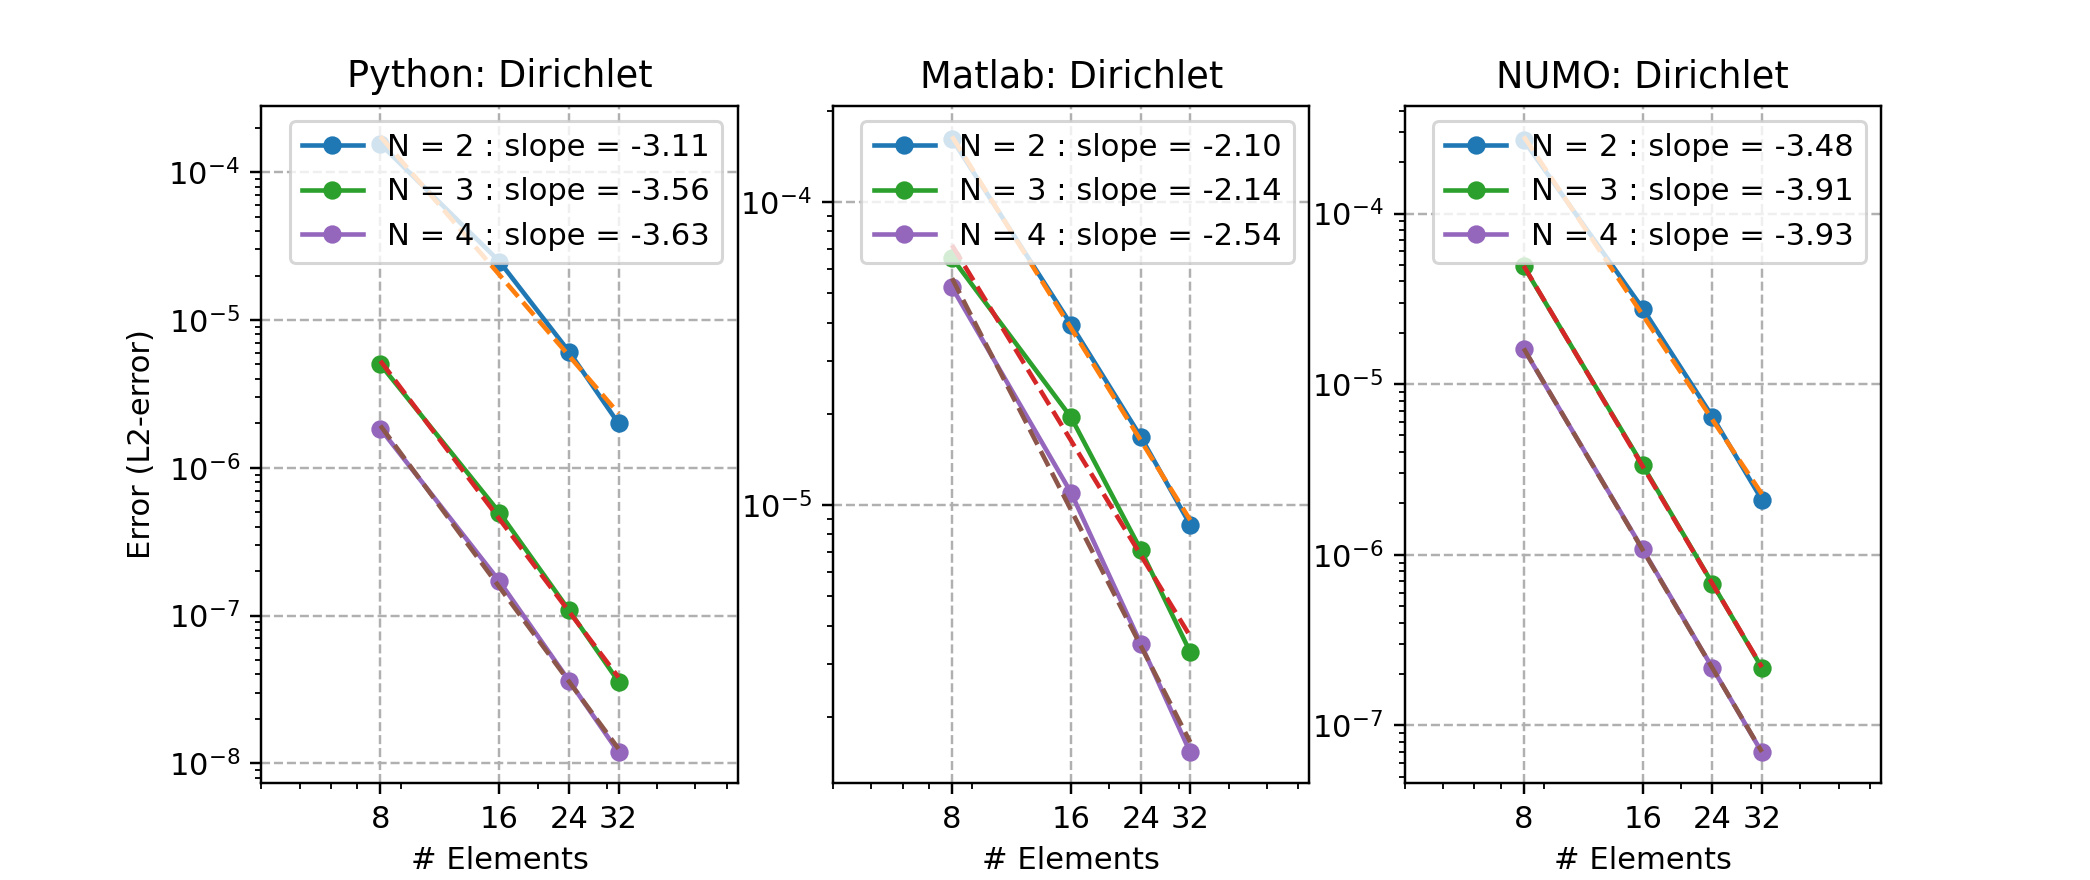

In [11]:

#plt.rcParams.update({'font.size': 8})

fg = figure(2,figsize=(9.5,4))

codes = ['Python','Matlab','NUMO']
sb_id = [131, 132, 133]

for idc, code in enumerate(codes):
    
    sbp = sb_id[idc]
    
    fg.add_subplot(sbp)

    for i,o in enumerate(orders):

        e2 = df.loc[idx['Diffusion','Dirichlet',code,o,:],'2-norm'].values

        if(o >= 4):
            p = polyfit(log(Nv[:]), log(e2.astype(float)[:]), 1)
        else:
            p = polyfit(log(Nv[:]), log(e2.astype(float)[:]), 1)

        loglog(Nv, e2, '.-',markersize = 10, label = 'N = {} : slope = {:.2f}'.format(o,p[0]))
        loglog(Nv, exp(polyval(p,log(Nv))), '--')

    set_xticks(Nv)
    xlabel('# Elements')
    if(idc == 0): ylabel('Error (L2-error)')
    title(code + ': Dirichlet')

    grid(axis='both',linestyle='--')
    legend()
    show()   